## Task - 6 Next Word Prediction Using LSTM 

- Author : **Rahul Rathour** 
- Data Science intern at LetsGrowMore
- link for the text file : https://www.gutenberg.org/cache/epub/1513/pg1513.txt

- References : https://ishwargautam.blogspot.com/2021/07/next-word-prediction-using-lstm.html

In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [34]:
from google.colab import files
uploaded = files.upload()

Saving 1661-0.txt to 1661-0.txt


In [46]:
file=open('1661-0.txt','r',encoding='utf8')

In [47]:
lines = []
for i in file:
    lines.append(i)

In [48]:
data=""
for i in lines:
    data=" ".join(lines)

In [49]:
data=data.replace('\n','').replace('\r','').replace('\ufeff','').replace('“','').replace('”','')

In [50]:
data=data.split()
data=' '.join(data)
data[:500]


"Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.net Title: The Adventures of Sherlock Holmes Author: Arthur Conan Doyle Release Date: November 29, 2002 [EBook #1661] Last Updated: May 20, 2019 Language: English Character set en"

In [51]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts([data])

In [52]:
#saving the tokenizer for predict function
pickle.dump(tokenizer,open('token.pkl','wb'))

In [53]:
sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[142, 4680, 1, 986, 5, 125, 33, 46, 556, 2164, 2165, 27, 987, 14, 22]

In [54]:
vocab_size=len(tokenizer.word_index) + 1
print(vocab_size)

8624


In [55]:
sequences = []
for i in range(3,len(sequence_data)):
    words=sequence_data[i-3:i+1]
    sequences.append(words)

In [56]:
print('The length of sequences',len(sequences))

The length of sequences 108955


In [57]:
sequences=np.array(sequences)
sequences[:10]

array([[ 142, 4680,    1,  986],
       [4680,    1,  986,    5],
       [   1,  986,    5,  125],
       [ 986,    5,  125,   33],
       [   5,  125,   33,   46],
       [ 125,   33,   46,  556],
       [  33,   46,  556, 2164],
       [  46,  556, 2164, 2165],
       [ 556, 2164, 2165,   27],
       [2164, 2165,   27,  987]])

In [58]:
X=[]
y=[]

In [59]:
for i in sequences:
    X.append(i[0:3])
    y.append(i[3])

In [60]:
X=np.array(X)
y=np.array(y)

In [61]:

print('Data: ',X[:10])
print('Response: ',y[:10])

Data:  [[ 142 4680    1]
 [4680    1  986]
 [   1  986    5]
 [ 986    5  125]
 [   5  125   33]
 [ 125   33   46]
 [  33   46  556]
 [  46  556 2164]
 [ 556 2164 2165]
 [2164 2165   27]]
Response:  [ 986    5  125   33   46  556 2164 2165   27  987]


In [62]:
y=to_categorical(y,num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [63]:
model=Sequential()
model.add(Embedding(vocab_size,10,input_length=3))
model.add(LSTM(1000,return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000,activation='relu'))
model.add(Dense(vocab_size,activation='softmax'))

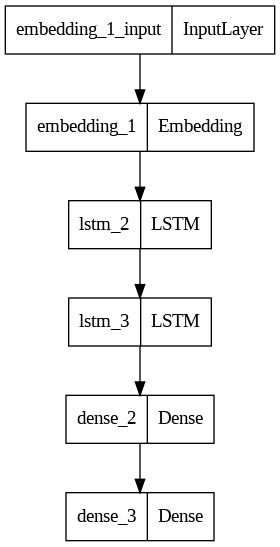

In [64]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3, 10)             86240     
                                                                 
 lstm_2 (LSTM)               (None, 3, 1000)           4044000   
                                                                 
 lstm_3 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_3 (Dense)             (None, 8624)              8632624   
                                                                 
Total params: 21,767,864
Trainable params: 21,767,864
Non-trainable params: 0
_________________________________________________________________


In [66]:

from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint=ModelCheckpoint('next_words.h5',monitor='loss',verbose=1,save_best_only=True)
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001))
model.fit(X,y,epochs=100,batch_size=64,callbacks=[checkpoint])

Epoch 1/100
1703/1703 [==============================] - ETA: 0s - loss: 6.3980
Epoch 1: loss improved from inf to 6.39797, saving model to next_words.h5
1703/1703 [==============================] - 37s 19ms/step - loss: 6.3980
Epoch 2/100
1703/1703 [==============================] - ETA: 0s - loss: 5.8038
Epoch 2: loss improved from 6.39797 to 5.80380, saving model to next_words.h5
1703/1703 [==============================] - 26s 16ms/step - loss: 5.8038
Epoch 3/100
1703/1703 [==============================] - ETA: 0s - loss: 5.4860
Epoch 3: loss improved from 5.80380 to 5.48597, saving model to next_words.h5
1703/1703 [==============================] - 27s 16ms/step - loss: 5.4860
Epoch 4/100
1703/1703 [==============================] - ETA: 0s - loss: 5.2320
Epoch 4: loss improved from 5.48597 to 5.23199, saving model to next_words.h5
1703/1703 [==============================] - 26s 15ms/step - loss: 5.2320
Epoch 5/100
1703/1703 [==============================] - ETA: 0s - loss: 4.9

In [67]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
  
  print(predicted_word)
  return predicted_word

In [ ]:
while(True):
  text = input("Enter your line: ")
  
  if text == "0":
      print("Execution completed.....")
      break
  
  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)
        
          Predict_Next_Words(model, tokenizer, text)
          
      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line: desire to see
['desire', 'to', 'see']
1/1 [==============================] - 1s 1s/step
what
Enter your line: how do you
['how', 'do', 'you']
1/1 [==============================] - 0s 21ms/step
know
Enter your line: country walk on
['country', 'walk', 'on']
1/1 [==============================] - 0s 23ms/step
thursday
Enter your line: a gentleman who
['a', 'gentleman', 'who']
1/1 [==============================] - 0s 21ms/step
desires
